Давайте подивимося, як LSTM можна використовувати для побудови нейронної мережі прогнозування часових.

Будемо працювати з задачею прогнозування кількості пасажирів міжнародних авіаліній. З цим набором даних ми вже працювали в лекції "Time Series Analysis" і ви зможете порівняти результати :)

Задача полягає в тому, щоб за заданими роком і місяцем передбачити кількість пасажирів міжнародних авіаліній в одиницях виміру 1,000. Дані охоплюють період з січня 1949 року по грудень 1960 року, тобто 12 років, зі 144 спостереженнями.

Це регресійна задача. Тобто, знаючи кількість пасажирів (в тисячах) за останні місяці, можна передбачити, якою буде кількість пасажирів у наступному місяці. Набір даних має лише одну характеристику: "Кількість пасажирів" - `Passengers`.

Далі вже наведений код для читання даних, але нам їх ще треба буде трошки обробити.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Завантаження даних
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)
df.set_index('Month', inplace=True)
display(df.head())

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


**Завдання 1.** Створіть змінну типу `numpy.ndarray`, яка містить значення кількості пасажирів в форматі `float32`. Такий формат даних нам треба для тренування нейромережі.

In [3]:
passangers_array = df['Passengers'].to_numpy(dtype=np.float32)
passangers_array

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.], dtype=float32)

Очікуваний результат:
```array([112., 118., 132., 129., 121.], dtype=float32)```

**Завдання 2**. Розбийте дані на тренувальні і валідаційні у співвідношенні 67% йде у тренування, 33 - у валідацію. Памʼятаємо, що ми працюємо з time series, відповідно, навчаємось на давніших, валідуємось - на новіших.

In [4]:
!pip install darts --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 931.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.2/934.2 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.4/271.4 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.6 MB/s eta 0:00

In [5]:
from darts import TimeSeries

df.index = pd.to_datetime(df.index)
series = TimeSeries.from_dataframe(df, value_cols='Passengers')

<Axes: xlabel='Month'>

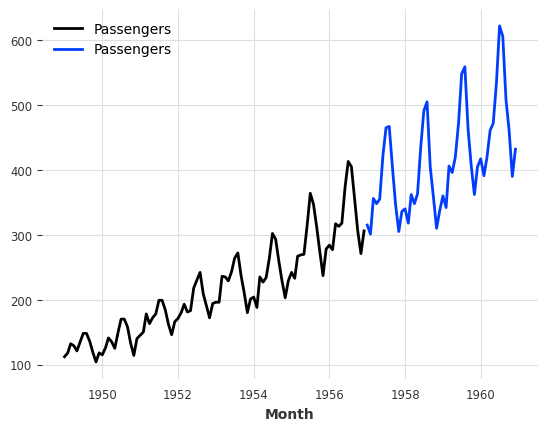

In [6]:
train, test = series.split_after(0.67)
train.plot()
test.plot()

In [7]:
train_size = int(len(passangers_array) * 0.67)

In [8]:
# Розбиття даних
train = passangers_array[:train_size]
test = passangers_array[train_size:]

print("Train data:", train)
print("Test data:", test)

Train data: [112. 118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126.
 141. 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163.
 172. 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218.
 230. 242. 209. 191. 172. 194. 196. 196. 236. 235. 229. 243. 264. 272.
 237. 211. 180. 201. 204. 188. 235. 227. 234. 264. 302. 293. 259. 229.
 203. 229. 242. 233. 267. 269. 270. 315. 364. 347. 312. 274. 237. 278.
 284. 277. 317. 313. 318. 374. 413. 405. 355. 306. 271. 306.]
Test data: [315. 301. 356. 348. 355. 422. 465. 467. 404. 347. 305. 336. 340. 318.
 362. 348. 363. 435. 491. 505. 404. 359. 310. 337. 360. 342. 406. 396.
 420. 472. 548. 559. 463. 407. 362. 405. 417. 391. 419. 461. 472. 535.
 622. 606. 508. 461. 390. 432.]


**Завдання 3**.

Реалізуйте функцію `create_dataset`, яка перетворить одномірний часовий ряд (набір даних) у формат, придатний для тренування нейромережі.

Функція повинна приймати два аргументи:
- `dataset` — numpy-масив часового ряду,
- `lookback` — кількість попередніх кроків, які використовуватимуться для передбачення.

Функція повинна повернути два **тензори** PyTorch:
- `X` — набір ознак (вікно попередніх значень),
- `y` — цільові значення (наступні після вікна кроки).

Дані ми будемо подавати моделі в наступному форматі:
`
tensor([[112.],
        [118.],
        [132.],
        [129.],
        [121.]])
`
Відповідно першою розмірністю буде йти розмір вхідного батча, а другою - розмір вхіднизх даних і в нас це 1, бо лише одне значення на вході щоразу.

Після виконання завдання запустіть код нижче. Ми будемо передбачати на основі кількості пасажирів в попередній день кількість пасажирів в наступний, тому `lookback == 1`.

In [9]:
import torch
def create_dataset(dataset, lookback):
    X, y = [], []

    # Проходимо по часовому ряду і формуємо набори (X, y)
    for i in range(len(dataset) - lookback):
        # Забираємо вікно розміром lookback для X
        X.append(dataset[i:i+lookback])
        # Забираємо значення після вікна для y
        y.append(dataset[i + lookback])

    # Перетворюємо списки у тензори PyTorch
    X = torch.tensor(X).float()
    y = torch.tensor(y).float().reshape(-1, 1)

    return X, y

In [10]:
lookback = 1
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([95, 1]) torch.Size([95, 1])
torch.Size([47, 1]) torch.Size([47, 1])


<ipython-input-9-cf882ee07f2b>:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  X = torch.tensor(X).float()


Очікуваний результат:
```
torch.Size([95, 1]) torch.Size([95, 1])
torch.Size([47, 1]) torch.Size([47, 1])
```

**Завдання 4**.

Зверніть увагу на розмірності в попередньому завданні. Ми
З допомогою модуля `torch.nn` опишіть клас `AirModel`, який є нейронною мережею для прогнозування кількості пасажирів за допомогою LSTM.

1. **Конструктор класу** повинен приймати параметри `hidden_size`, `num_layers` та ініціювати шари:
   - LSTM-шар з наступними параметрами:
     - `input_size` — кожна точка часового ряду є окремим входом,,
     - `hidden_size` — заданий в конструкторі класу мережі,
     - `num_layers=1` — кількість шарів LSTM, задана в конструкторі мережі,
     - `batch_first=True` — визначає, що першим виміром є розмір батчу.
   - Лінійний шар (`nn.Linear`) для перетворення виходу LSTM на прогноз однієї точки.

2. **Метод forward** повинен виконувати наступні дії:
   - Передати вхідний тензор через LSTM-шар і отримати виходи (ігноруючи приховані стани).
   - Пропустити вихід LSTM через лінійний шар для отримання остаточного прогнозу.

Створіть об'єкт класу `AirModel` зі значеннями параметрів `hidden_size=50`, `num_layers=1` і протестуйте роботу моделі на вхідному тензорі `tensor([[112.]])`. На цьому етапі ми маємо переконатись, що модель здатна генерувати передбачення з рандомно ініційованими вагами.

In [48]:
import torch.nn as nn

class AirModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1, batch_first=True):
        super(AirModel, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=batch_first)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, X):
        lstm_out, _ = self.lstm(X)
        out = self.fc(lstm_out[:, -1, :])
        return out

In [30]:
class AirModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1, batch_first=True):
        super(AirModel, self).__init__()

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=batch_first)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, X):
        # Перевіряємо, чи вхід має правильну розмірність
        lstm_out, _ = self.lstm(X)
        # Вибираємо останній вихід LSTM для кожного батчу
        out = self.fc(lstm_out[:, -1, :])
        return out


In [34]:
model = AirModel(hidden_size=50, num_layers=1)

# Тест моделs на вхідному тензорі
test_input = torch.tensor([[112.]]).float().unsqueeze(0)  # Додаємо вимір для батчу
output = model(test_input)

# Перевіряємо результат
print("Output:", output)

Output: tensor([[0.1857]], grad_fn=<AddmmBackward0>)


**Завдання 5**.

Створіть об'єкт DataLoader для завантаження даних, використовуючи тренувальні вибірки `X_train` та `y_train`. Ваш DataLoader повинен виконувати наступні вимоги:

1. Використовувати клас `TensorDataset`, щоб об'єднати тензори ознак `X_train` і цільових значень `y_train`.
2. Дані повинні завантажуватися невеликими батчами розміром 8 за допомогою параметра `batch_size`.
3. Використовувати параметр `shuffle=True`, щоб дані перемішувалися перед кожною епохою тренування.


In [13]:
from torch.utils.data import TensorDataset, DataLoader

In [35]:
X_train = X_train.view(X_train.shape[0], 1, X_train.shape[1])  # (batch_size, sequence_length=1, input_size)
X_test = X_test.view(X_test.shape[0], 1, X_test.shape[1])


In [36]:
train_ds = TensorDataset(X_train, y_train)
train_ds[0:3]

(tensor([[[112.]],
 
         [[118.]],
 
         [[132.]]]),
 tensor([[118.],
         [132.],
         [129.]]))

In [37]:
batch_size = 8
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [38]:
test_ds = TensorDataset(X_test, y_test)

In [39]:
test_dl = DataLoader(test_ds, batch_size, shuffle=True)

**Завдання 6**.

1. Реалізуйте навчання нейронної мережі `AirModel` для прогнозування часових рядів, використовуючи Adam-оптимізатор та функцію втрат MSE (середньоквадратичну похибку).
2. Створіть цикл тренування для 2000 епох, у якому на кожній епосі:
   - Виконуйте крок тренування моделі (прямий прохід, обчислення похибки, зворотний прохід і оновлення ваг).
   - Підраховуйте середню похибку на кожному батчі даних і зберігайте її у списку `losses`.
3. Раз на 100 епох проводьте валідацію моделі:
   - Перевіряйте модель на тренувальних та тестових даних без оновлення ваг.
   - Обчислюйте корінь середньоквадратичної похибки (RMSE) для тренувальної та тестової вибірок і виводьте результати на екран.
   
**Примітка:**
- Використовуйте вже створений `DataLoader` для отримання батчів даних.
- Валідацію виконуйте в режимі `eval()`, вимикаючи обчислення градієнтів з `torch.no_grad()`.

**Приклад виходу:**
```
Epoch 0: train RMSE 12.3456, test RMSE 15.6789
Epoch 100: train RMSE 9.8765, test RMSE 12.3456
...
```

In [18]:
import torch.nn.functional as F

In [19]:
opt = torch.optim.Adam(model.parameters(), lr=1e-5)

loss_fn = F.mse_loss
RMSE_loss = torch.sqrt(loss_fn(X_train, y_train))

In [20]:
RMSE_loss

tensor(23.3333)

In [40]:
import torch.optim as optim

def fit_return_loss(num_epochs, model, loss_fn, opt, train_dl, test_dl):
    losses = []
    for epoch in range(num_epochs):
        # Ініціалізуємо акумулятор для втрат
        total_loss = 0
        model.train()  # Перемикаємо модель в режим навчання

        for xb, yb in train_dl:
            # Прямий прохід - генерація передбачення
            pred = model(xb)

            # Обчислення втрат
            loss = loss_fn(pred, yb)

            # Зворотний прохід і оновлення ваг
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Накопичуємо втрати
            total_loss += loss.item()

        # Середні втрати для епохи
        avg_loss = total_loss / len(train_dl)
        losses.append(avg_loss)

        # Валідація раз на 100 епох
        if (epoch + 1) % 100 == 0:
            model.eval()  # Перемикаємо модель в режим валідації
            train_rmse = 0
            test_rmse = 0

            # Перевірка на тренувальній вибірці
            train_rmse = validate_model(model, train_dl, loss_fn)

            # Перевірка на тестовій вибірці
            test_rmse = validate_model(model, test_dl, loss_fn)

            print(f'Epoch {epoch+1}: train RMSE {train_rmse:.4f}, test RMSE {test_rmse:.4f}')

    return losses



# Підготовка до навчання: Adam-оптимізатор та MSE-функція втрат
model = AirModel(hidden_size=50, num_layers=1)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Запуск тренування
losses = fit_return_loss(num_epochs=2000, model=model, loss_fn=loss_fn, opt=optimizer, train_dl=train_dl, test_dl=test_dl)


Epoch 100: train RMSE 186.6634, test RMSE 380.6464
Epoch 200: train RMSE 154.5389, test RMSE 347.1600
Epoch 300: train RMSE 125.9150, test RMSE 314.0544
Epoch 400: train RMSE 101.8435, test RMSE 284.0238
Epoch 500: train RMSE 83.7956, test RMSE 258.9192
Epoch 600: train RMSE 67.9918, test RMSE 233.3923
Epoch 700: train RMSE 54.4860, test RMSE 210.1978
Epoch 800: train RMSE 45.0443, test RMSE 189.1897
Epoch 900: train RMSE 37.1930, test RMSE 171.9651
Epoch 1000: train RMSE 32.2663, test RMSE 154.7332
Epoch 1100: train RMSE 29.0334, test RMSE 142.1075
Epoch 1200: train RMSE 27.1927, test RMSE 130.9614
Epoch 1300: train RMSE 25.5591, test RMSE 123.2008
Epoch 1400: train RMSE 24.8688, test RMSE 116.9811
Epoch 1500: train RMSE 24.5287, test RMSE 112.0848
Epoch 1600: train RMSE 24.5685, test RMSE 108.5509
Epoch 1700: train RMSE 24.2836, test RMSE 103.4097
Epoch 1800: train RMSE 23.4651, test RMSE 102.8594
Epoch 1900: train RMSE 23.5318, test RMSE 100.1891
Epoch 2000: train RMSE 23.3209, test

**Завдання 7.** Побудуйте графік лосів. Зробіть висновок з графіку, чи навчилась модель?

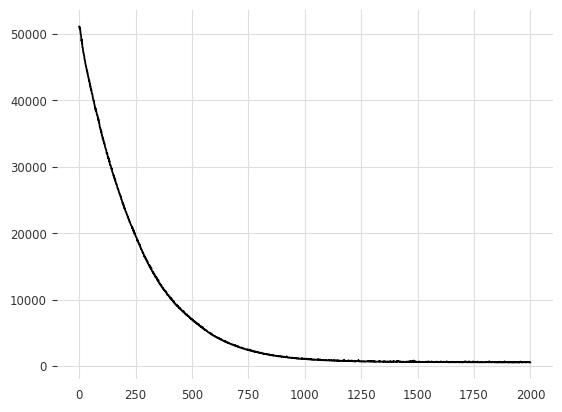

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.plot(losses);

Модель навчилась, але не факт, що точно)

Доволі неочікувано, що середньоквадратичне відхилення тестового набору даних буде на порядок більшим за одиниці в нашому наборі даних. Середньоквадратичне відхилення 100 означає, що прогноз і фактичне значення будуть відрізнятися в середньому на 100 (тобто, 100 000 пасажирів у цьому наборі даних).



Щоб краще зрозуміти якість прогнозу, ви можете побудувати графік з кодом нижче (а ще нижче - описано, що відбувається в цьому коді, бо це теж корисно зрозуміти):

In [46]:
timeseries = series.values().squeeze()

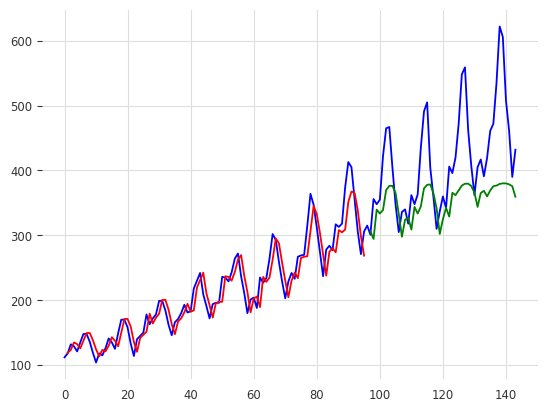

In [87]:
def plot_predicts():
  with torch.no_grad():
      # Зсув прогнозів для тренувальних даних
      train_plot = np.ones_like(timeseries) * np.nan
      y_pred = model(X_train)
      y_pred = y_pred[:, -1]
      train_plot[lookback:train_size] = model(X_train)[:, -1]

      # Зсув прогнозів для тестових даних
      test_plot = np.ones_like(timeseries) * np.nan
      test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1]

  # Візуалізація результатів
  plt.plot(timeseries, c='b')  # Реальні дані
  plt.plot(train_plot, c='r')  # Прогнози на тренувальних даних
  plt.plot(test_plot, c='g')   # Прогнози на тестових даних
  plt.show()

plot_predicts()

**Що відбувається в коді вище.** В цьому коді здійснюється процес прогнозування часових рядів за допомогою LSTM моделі, а також виведення графіку, який показує реальні значення, тренувальні та тестові прогнози. Ось що відбувається на кожному етапі:

1. **`torch.no_grad()`**: Цей контекстний менеджер вимикає обчислення градієнтів, що означає, що під час прогнозування не будуть зберігатися проміжні обчислення для зворотного проходу (backpropagation). Це підвищує ефективність під час прогнозування і зменшує використання пам'яті.

2. **Зсув прогнозів для тренувальних даних:**
   - Створюється масив `train_plot`, який має такий самий розмір, як і часовий ряд (`timeseries`), і заповнюється значеннями NaN (`np.nan`), щоб залишити місце для реальних значень.
   - Модель передбачає виходи для тренувальних даних `X_train`.
   - Використовується лише останнє передбачене значення для кожного входу LSTM (`y_pred[:, -1]`).
   - Прогнози зсуваються, починаючи з індексу `lookback` до кінця тренувальних даних (індекс `train_size`). Цей зсув потрібен, щоб зробити прогноз на основі попередніх даних і відобразити його на правильній частині графіку.

3. **Зсув прогнозів для тестових даних:**
   - Створюється масив `test_plot`, який також заповнюється NaN.
   - Прогнози для тестових даних додаються з індексу `train_size + lookback` до кінця реальних даних, щоб відобразити, де модель починає прогнозувати тестову вибірку.

4. **Побудова графіка:**
   - `plt.plot(timeseries, c='b')`: Виводить реальні значення часового ряду (синя лінія).
   - `plt.plot(train_plot, c='r')`: Виводить тренувальні прогнози (червона лінія).
   - `plt.plot(test_plot, c='g')`: Виводить тестові прогнози (зелена лінія).

**Чому це робиться:**
- Зсув прогнозів для тренувальних і тестових даних дозволяє візуально зрівняти, наскільки добре модель прогнозує як на тренувальній, так і на тестовій вибірках. Зазвичай, червона лінія (тренувальні прогнози) повинна точно відповідати синій лінії (реальні дані), а зелена лінія (тестові прогнози) дає змогу побачити, наскільки модель добре працює на нових даних, яких вона раніше не бачила.

**Завдання 8**. Навчіть модель з hidden_size=100 та порівняйте результати прогнозів з попередніми.

In [76]:
class AirModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=100, num_layers=1, batch_first=True):
        super(AirModel, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=batch_first)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, X):
        lstm_out, _ = self.lstm(X)
        out = self.fc(lstm_out[:, -1, :])
        return out

Epoch 100: train RMSE 150.2093, test RMSE 342.6669
Epoch 200: train RMSE 101.3093, test RMSE 285.0999
Epoch 300: train RMSE 72.1542, test RMSE 239.6879
Epoch 400: train RMSE 51.3377, test RMSE 203.2601
Epoch 500: train RMSE 38.7335, test RMSE 173.3908
Epoch 600: train RMSE 31.2293, test RMSE 151.6109
Epoch 700: train RMSE 27.2235, test RMSE 131.8626
Epoch 800: train RMSE 25.6546, test RMSE 119.1321
Epoch 900: train RMSE 24.2140, test RMSE 111.2253
Epoch 1000: train RMSE 23.9099, test RMSE 104.1646
Epoch 1100: train RMSE 23.4890, test RMSE 99.5096
Epoch 1200: train RMSE 23.6845, test RMSE 97.3171
Epoch 1300: train RMSE 24.1617, test RMSE 94.9151
Epoch 1400: train RMSE 23.1837, test RMSE 91.1992
Epoch 1500: train RMSE 23.0780, test RMSE 91.0618
Epoch 1600: train RMSE 23.4463, test RMSE 88.8144
Epoch 1700: train RMSE 23.0024, test RMSE 87.6405
Epoch 1800: train RMSE 22.9903, test RMSE 88.0836
Epoch 1900: train RMSE 22.9574, test RMSE 86.5512
Epoch 2000: train RMSE 23.0776, test RMSE 87.21

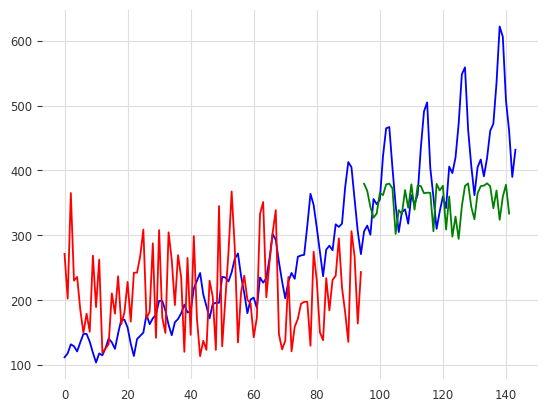

In [86]:
# Функція для отримання прогнозів після навчання
def get_predictions(model, data_loader):
    model.eval()  # Перемикаємо модель в режим оцінювання
    predictions = []
    with torch.no_grad():
        for xb, _ in data_loader:
            pred = model(xb)
            predictions.append(pred.cpu().numpy())

    return np.concatenate(predictions, axis=0)

# Функція для побудови графіка
def plot_predictions(series, train_preds, test_preds, train_size):
    # Перевірка, що series є масивом або часовим рядом
    series_values = series.all_values().squeeze()  # Якщо ви використовуєте Darts TimeSeries
    # або для Pandas DataFrame/Series:
    # series_values = series.values.squeeze()

    # Підготовка до графіку: створення масиву для тренувальних прогнозів
    train_plot = np.ones_like(series_values) * np.nan
    train_plot[:train_size] = train_preds.squeeze()

    # Підготовка до графіку: створення масиву для тестових прогнозів
    test_plot = np.ones_like(series_values) * np.nan

    # Якщо розмір тестових прогнозів менший за потрібний розмір
    if len(test_preds) != len(series_values[train_size:]):
        min_len = min(len(test_preds), len(series_values[train_size:]))
        test_plot[train_size:train_size+min_len] = test_preds[:min_len].squeeze()
    else:
        test_plot[train_size:] = test_preds.squeeze()

    # Візуалізація результатів
    plt.plot(series_values, c='b')  # Реальні дані
    plt.plot(train_plot, c='r')     # Прогнози на тренувальних даних
    plt.plot(test_plot, c='g')      # Прогнози на тестових даних
    plt.show()


# Підготовка до навчання: Adam-оптимізатор та MSE-функція втрат
model = AirModel(hidden_size=100, num_layers=1)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Запуск тренування
trained_model = fit_model(num_epochs=2000, model=model, loss_fn=loss_fn, opt=optimizer, train_dl=train_dl, test_dl=test_dl)

# Отримання прогнозів після навчання
train_preds = get_predictions(trained_model, train_dl)
test_preds = get_predictions(trained_model, test_dl)

# Візуалізація результатів
plot_predictions(series, train_preds, test_preds, train_size=len(train_dl.dataset))

In [90]:
class AirModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1, batch_first=True):
        super(AirModel, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=batch_first)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, X):
        lstm_out, _ = self.lstm(X)
        out = self.fc(lstm_out[:, -1, :])
        return out

Epoch 100: train RMSE 190.6343, test RMSE 385.1678
Epoch 200: train RMSE 160.3889, test RMSE 353.7984
Epoch 300: train RMSE 133.1941, test RMSE 322.5115
Epoch 400: train RMSE 108.5632, test RMSE 293.6652
Epoch 500: train RMSE 89.9117, test RMSE 267.6643
Epoch 600: train RMSE 73.3448, test RMSE 244.5818
Epoch 700: train RMSE 59.5192, test RMSE 219.8390
Epoch 800: train RMSE 48.8191, test RMSE 199.3648
Epoch 900: train RMSE 42.1339, test RMSE 180.6269
Epoch 1000: train RMSE 35.7045, test RMSE 164.7764
Epoch 1100: train RMSE 30.7708, test RMSE 149.6243
Epoch 1200: train RMSE 29.1101, test RMSE 139.3559
Epoch 1300: train RMSE 26.4891, test RMSE 129.7082
Epoch 1400: train RMSE 25.4634, test RMSE 122.4419
Epoch 1500: train RMSE 25.3767, test RMSE 115.3006
Epoch 1600: train RMSE 24.5985, test RMSE 111.7221
Epoch 1700: train RMSE 24.7938, test RMSE 106.6530
Epoch 1800: train RMSE 24.5374, test RMSE 105.1432
Epoch 1900: train RMSE 25.0041, test RMSE 101.3241
Epoch 2000: train RMSE 25.0417, test

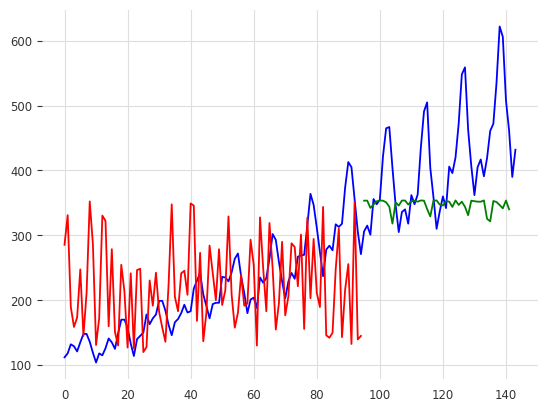

In [91]:
# Функція для отримання прогнозів після навчання
def get_predictions(model, data_loader):
    model.eval()  # Перемикаємо модель в режим оцінювання
    predictions = []
    with torch.no_grad():
        for xb, _ in data_loader:
            pred = model(xb)
            predictions.append(pred.cpu().numpy())

    return np.concatenate(predictions, axis=0)

# Функція для побудови графіка
def plot_predictions(series, train_preds, test_preds, train_size):
    # Перевірка, що series є масивом або часовим рядом
    series_values = series.all_values().squeeze()  # Якщо ви використовуєте Darts TimeSeries
    # або для Pandas DataFrame/Series:
    # series_values = series.values.squeeze()

    # Підготовка до графіку: створення масиву для тренувальних прогнозів
    train_plot = np.ones_like(series_values) * np.nan
    train_plot[:train_size] = train_preds.squeeze()

    # Підготовка до графіку: створення масиву для тестових прогнозів
    test_plot = np.ones_like(series_values) * np.nan

    # Якщо розмір тестових прогнозів менший за потрібний розмір
    if len(test_preds) != len(series_values[train_size:]):
        min_len = min(len(test_preds), len(series_values[train_size:]))
        test_plot[train_size:train_size+min_len] = test_preds[:min_len].squeeze()
    else:
        test_plot[train_size:] = test_preds.squeeze()

    # Візуалізація результатів
    plt.plot(series_values, c='b')  # Реальні дані
    plt.plot(train_plot, c='r')     # Прогнози на тренувальних даних
    plt.plot(test_plot, c='g')      # Прогнози на тестових даних
    plt.show()


# Підготовка до навчання: Adam-оптимізатор та MSE-функція втрат
model = AirModel(hidden_size=50, num_layers=1)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Запуск тренування
trained_model = fit_model(num_epochs=2000, model=model, loss_fn=loss_fn, opt=optimizer, train_dl=train_dl, test_dl=test_dl)

# Отримання прогнозів після навчання
train_preds = get_predictions(trained_model, train_dl)
test_preds = get_predictions(trained_model, test_dl)

# Візуалізація результатів
plot_predictions(series, train_preds, test_preds, train_size=len(train_dl.dataset))

З hidden_size=100 результат ртрохи кращий, і по лосах і по візуалізації. Проте треба попрацювати трохи ще з декомпозицією, щоб задати тренд і буде краще.